In [1]:
# import Torch packages and its submodules
import torch
from torch import nn, optim

# import TorchVision and its submodules
import torch.nn.functional as F
from torchvision import datasets, transforms

# import other packages
import numpy as np
import math

import matplotlib
from matplotlib import pyplot as plt


Task1

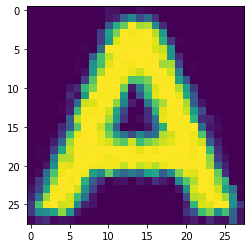

In [19]:
# Define a transform to tensor gray data
transform = transforms.Compose([transforms.Grayscale(),transforms.ToTensor(),])
PATH = "notMNIST_small"
# Put data into dataloader
dataset = datasets.ImageFolder(root=PATH, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)
plt.imshow(dataset[0][0].squeeze())
plt.show()

# split data into training, validation and test set
train_set, val_set, test_set = torch.utils.data.random_split(dataset, [15000, 1000, len(dataset) - 16000])

train_set = torch.utils.data.DataLoader(train_set, batch_size=1, shuffle=True)
val_set = torch.utils.data.DataLoader(val_set, batch_size=1, shuffle=True)
test_set = torch.utils.data.DataLoader(test_set, batch_size=1, shuffle=True)


Task 2 3 4

In [4]:
# model
class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(28*28, 1000)
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return F.softmax(x)

In [54]:
model = nn.Sequential(nn.Linear(784,500),
                      nn.ReLU(),
                      nn.Linear(500,500),
                      nn.ReLU(),
                      nn.Linear(500, 10),
                      nn.Softmax())

# Define the loss
criterion = nn.CrossEntropyLoss()
# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

train_loss = []
train_acc = []
val_loss = []
val_acc = []
test_loss = []
test_acc = []

epochs = 10
for e in range(epochs):
    counter = 0
    running_loss = 0
    for images, labels in train_set:
        counter += 1

        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    train_loss.append(running_loss/len(train_set.dataset))

    # train accuracy
    accuracy = 0

    for images, labels in train_set:
        images = images.view(images.shape[0], -1)
        pred = model(images)

        top_p, top_class = pred.topk(1, dim=1)
        for i in range(len(labels)):
            if top_class[i].item() == labels[i]:
                accuracy += 1
    train_acc.append(accuracy/len(train_set.dataset))
    print(f"Epoch {e+1}, Training loss: {running_loss/len(train_set.dataset)}, Train accuracy: {accuracy/len(train_set.dataset)}")  

    # valid error
    accuracy = 0
    val_running_loss = 0

    for images, labels in val_set:
        images = images.view(images.shape[0], -1)
        pred = model(images)
        loss = criterion(pred, labels)
        val_running_loss += loss

        top_p, top_class = pred.topk(1, dim=1)
        for i in range(len(labels)):
            if top_class[i].item() == labels[i]:
                accuracy += 1
        
    print("Epoch {}, Valid Loss: {}, Valid Accuracy: {:.3f}".format(e+1, val_running_loss/len(val_set.dataset), accuracy/len(val_set.dataset)))
    val_loss.append(val_running_loss/len(val_set.dataset))
    val_acc.append(accuracy/len(val_set.dataset))

    # # test error
    # accuracy = 0
    # test_running_loss = 0

    # for images, labels in test_set:
    #     images = images.view(images.shape[0], -1)
    #     pred = model(images)
    #     loss = criterion(pred, labels)
    #     test_running_loss += loss

    #     # get the predictions: argmax etc.
    #     top_p, top_class = pred.topk(1, dim=1)
    #     for i in range(len(labels)):
    #         if top_class[i].item() == labels[i]:
    #             accuracy += 1

    # print("Epoch {}, Test Loss: {}, Test Accuracy: {:.3f}".format(e+1, test_running_loss/len(test_set.dataset), accuracy/len(test_set.dataset)))
    # test_loss.append(test_running_loss/ len(test_set.dataset))
    # test_acc.append(accuracy/len(test_set.dataset))



/Users/jimmyzheng/opt/anaconda3/lib/python3.7/site-packages/torch/nn/modules/container.py:100: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch 1, Training loss: 1.7909219048817953, Train accuracy: 0.7986666666666666
Epoch 1, Valid Loss: 1.6730022430419922, Valid Accuracy: 0.789
Epoch 2, Training loss: 1.6654353649218878, Train accuracy: 0.8032
Epoch 2, Valid Loss: 1.6557978391647339, Valid Accuracy: 0.804
Epoch 3, Training loss: 1.6405191870053608, Train accuracy: 0.9042
Epoch 3, Valid Loss: 1.578701376914978, Valid Accuracy: 0.883
Epoch 4, Training loss: 1.5655361478090286, Train accuracy: 0.9088666666666667
Epoch 4, Valid Loss: 1.5732589960098267, Valid Accuracy: 0.889
Epoch 5, Training loss: 1.5561897614955902, Train accuracy: 0.9174
Epoch 5, Valid Loss: 1.5690351724624634, Valid Accuracy: 0.891
Epoch 6, Training loss: 1.5487092996994654, Train accuracy: 0.916
Epoch 6, Valid Loss: 1.5605688095092773, Valid Accuracy: 0.902
Epoch 7, Training loss: 1.544945517897606, Train accuracy: 0.9206666666666666
Epoch 7, Valid Loss: 1.5636616945266724, Valid Accuracy: 0.897
Epoch 8, Training loss: 1.5407059283892313, Train accurac

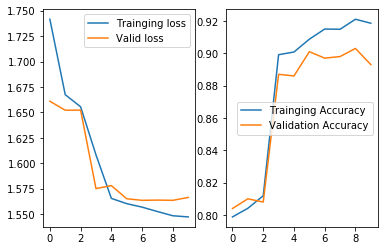

In [60]:
fig, axs = plt.subplots(1,2)
axs[0].plot(np.array(train_loss), label = "Trainging loss")
axs[0].plot(np.array(val_loss), label = "Valid loss")
# axs[0].plot(np.array(test_loss), label = "Test Loss")
axs[0].legend()

axs[1].plot(train_acc, label = "Trainging Accuracy")
axs[1].plot(val_acc, label = "Validation Accuracy")
# axs[1].plot(train_acc, label = "Trainging Accuracy")
axs[1].legend()

In [56]:
# test error
accuracy = 0
test_running_loss = 0

for images, labels in test_set:
    images = images.view(images.shape[0], -1)
    pred = model(images)
    loss = criterion(pred, labels)
    test_running_loss += loss

    # get the predictions: argmax etc.
    top_p, top_class = pred.topk(1, dim=1)
    for i in range(len(labels)):
        if top_class[i].item() == labels[i]:
            accuracy += 1
print(accuracy/len(test_set.dataset))

/Users/jimmyzheng/opt/anaconda3/lib/python3.7/site-packages/torch/nn/modules/container.py:100: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0.9001468428781204


Task 5 Dropout

In [57]:
model = nn.Sequential(nn.Linear(784,1000),
                      nn.ReLU(),
                      nn.Dropout(0.5),
                      nn.Linear(1000, 10),
                      nn.Softmax())

# Define the loss
criterion = nn.CrossEntropyLoss()
# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

train_loss = []
train_acc = []
val_loss = []
val_acc = []
test_loss = []
test_acc = []

epochs = 10
for e in range(epochs):
    model.train()
    counter = 0
    running_loss = 0
    for images, labels in train_set:
        counter += 1

        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    train_loss.append(running_loss/len(train_set.dataset))

    # train accuracy
    accuracy = 0

    for images, labels in train_set:
        images = images.view(images.shape[0], -1)
        pred = model(images)

        top_p, top_class = pred.topk(1, dim=1)
        for i in range(len(labels)):
            if top_class[i].item() == labels[i]:
                accuracy += 1
    train_acc.append(accuracy/len(train_set.dataset))
    print(f"Epoch {e+1}, Training loss: {running_loss/len(train_set.dataset)}, Train accuracy: {accuracy/len(train_set.dataset)}")  

    model.eval()
    # valid error
    accuracy = 0
    val_running_loss = 0

    for images, labels in val_set:
        images = images.view(images.shape[0], -1)
        pred = model(images)
        loss = criterion(pred, labels)
        val_running_loss += loss

        top_p, top_class = pred.topk(1, dim=1)
        for i in range(len(labels)):
            if top_class[i].item() == labels[i]:
                accuracy += 1
        
    print("Epoch {}, Valid Loss: {}, Valid Accuracy: {:.3f}".format(e+1, val_running_loss/len(val_set.dataset), accuracy/len(val_set.dataset)))
    val_loss.append(val_running_loss/len(val_set.dataset))
    val_acc.append(accuracy/len(val_set.dataset))

/Users/jimmyzheng/opt/anaconda3/lib/python3.7/site-packages/torch/nn/modules/container.py:100: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch 1, Training loss: 1.7415115685621898, Train accuracy: 0.7988
Epoch 1, Valid Loss: 1.6610021591186523, Valid Accuracy: 0.804
Epoch 2, Training loss: 1.6674253222465516, Train accuracy: 0.8041333333333334
Epoch 2, Valid Loss: 1.6521915197372437, Valid Accuracy: 0.810
Epoch 3, Training loss: 1.6555689032475154, Train accuracy: 0.8118666666666666
Epoch 3, Valid Loss: 1.652296781539917, Valid Accuracy: 0.808
Epoch 4, Training loss: 1.6083592546145122, Train accuracy: 0.8991333333333333
Epoch 4, Valid Loss: 1.5752291679382324, Valid Accuracy: 0.887
Epoch 5, Training loss: 1.5656225205024084, Train accuracy: 0.9008
Epoch 5, Valid Loss: 1.5781995058059692, Valid Accuracy: 0.886
Epoch 6, Training loss: 1.560445082449913, Train accuracy: 0.9087333333333333
Epoch 6, Valid Loss: 1.5652483701705933, Valid Accuracy: 0.901
Epoch 7, Training loss: 1.5570362313508987, Train accuracy: 0.915
Epoch 7, Valid Loss: 1.5637155771255493, Valid Accuracy: 0.897
Epoch 8, Training loss: 1.5526984762827556, T

In [59]:
# test error
accuracy = 0
test_running_loss = 0

for images, labels in test_set:
    images = images.view(images.shape[0], -1)
    pred = model(images)
    loss = criterion(pred, labels)
    test_running_loss += loss

    # get the predictions: argmax etc.
    top_p, top_class = pred.topk(1, dim=1)
    for i in range(len(labels)):
        if top_class[i].item() == labels[i]:
            accuracy += 1
print(accuracy/len(test_set.dataset))

/Users/jimmyzheng/opt/anaconda3/lib/python3.7/site-packages/torch/nn/modules/container.py:100: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0.9107929515418502
